<h1 style="font-size: 3rem; color:Orange;">Car Sales Analysis</h1>

# Introduction

The sample data given contains 2.5 million rows of information on car sales from a dealership, over the course of two years.

By analyzing this dataset, I hope to draw out some valuable information which the dealership can use to improve future sales. Advantages that come to mind include understanding customer behaviour, for example which car models are the most popular? What are customers willing to pay for a car? We may be able to identify seasonal trends, we can optimize the dealerships inventory and time sales events accordingly. By gaining insights from the dataset, I hope to find methods the dealership can use to increase thier sales revenue.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np

## Exploring the dataset

In [2]:
ds = pd.read_csv(r"C:\Users\yanik\OneDrive\Documents\Datasets\car_sales_data.csv")

In [3]:
ds.columns

Index(['Date', 'Salesperson', 'Customer Name', 'Car Make', 'Car Model',
       'Car Year', 'Sale Price', 'Commission Rate', 'Commission Earned'],
      dtype='object')

    Date: The date of the sale
    Salesperson: The person who sold the car
    Customer Name: The person who bought the car
    Car Make: The manufacturer of the car sold
    Car Model: The model of the car sold
    Car Year: The year of the particular car sold
    Sale Price: The amount the car was sold for
    Commision Rate: The rate of commision the Salesperson makes from the sale
    Commision Earned: How much the Salesperson makes from the sale

In [4]:
ds.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


In [5]:
ds.tail()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
2499995,2022-05-26,Isabella Moore,Shirley Lee,Chevrolet,Silverado,2021,49823,0.062977,3137.70
2499996,2022-10-03,Kimberly Snow,Tara Rodgers,Ford,F-150,2022,18803,0.068339,1284.97
2499997,2022-06-07,Jessica Young,Jennifer Moore,Chevrolet,Civic,2010,30863,0.088915,2744.19
2499998,2023-02-15,Donald Barber,Ashley Diaz,Honda,Silverado,2014,26125,0.088260,2305.80
2499999,2023-03-24,Kayla Fowler,Nathan Thompson,Honda,Civic,2010,20762,0.137105,2846.57


## Cleaning and preparing the data

## Removing Duplicates

In [7]:
# Drop duplicate rows based on all columns
ds = ds.drop_duplicates()

## Handling missing values

In [8]:
# Check for missing values
print('Missing values:\n', ds.isnull().sum())

Missing values:
 Date                 0
Salesperson          0
Customer Name        0
Car Make             0
Car Model            0
Car Year             0
Sale Price           0
Commission Rate      0
Commission Earned    0
dtype: int64


## Correcting Formats

In [11]:
# Convert date column to a datetime format
ds['Date'] = pd.to_datetime(ds['Date'])

## Validating Data 

In [19]:
# Check that each numeric column does not contain negative values
for column in ds.columns[1:]:
    if (ds[column].dtype == 'int64'):
        if (ds[column] < 0).any():
            print(f"Column '{column}' contains negative values")

# Analysis

In [21]:
# Check the range of values for each variable
print('Variable ranges:\n', ds.describe())

Variable ranges:
            Car Year    Sale Price  Commission Rate  Commission Earned
count  2.500000e+06  2.500000e+06     2.500000e+06       2.500000e+06
mean   2.015996e+03  3.001218e+04     9.998766e-02       3.001005e+03
std    3.739132e+00  1.154514e+04     2.887202e-02       1.481467e+03
min    2.010000e+03  1.000000e+04     5.000014e-02       5.013400e+02
25%    2.013000e+03  2.001900e+04     7.496450e-02       1.821710e+03
50%    2.016000e+03  3.000600e+04     1.000058e-01       2.741910e+03
75%    2.019000e+03  4.002200e+04     1.250065e-01       3.978142e+03
max    2.022000e+03  5.000000e+04     1.500000e-01       7.494530e+03


The mean car year is 2016, while the mean car sale price is __$30012.18__.

Car sales prices deviate $11545.14 indicating __car sales price can vary egregiously__.

Average commision rate for cars sold is roughly __10%__, the lowest being 5%, highest 15%.

Salespeople make __$3001.00__ on average a car sold, the highest any salesperson has made off a sale has been __7494.53.__

In [24]:
unique_car_makes = ds['Car Make'].unique()
unique_car_models = ds['Car Model'].unique()

print("Unique Car Makes: \n", unique_car_makes)
print("Unique Car Models: \n", unique_car_models)

Unique Car Makes: 
 ['Nissan' 'Ford' 'Honda' 'Toyota' 'Chevrolet']
Unique Car Models: 
 ['Altima' 'F-150' 'Civic' 'Silverado' 'Corolla']


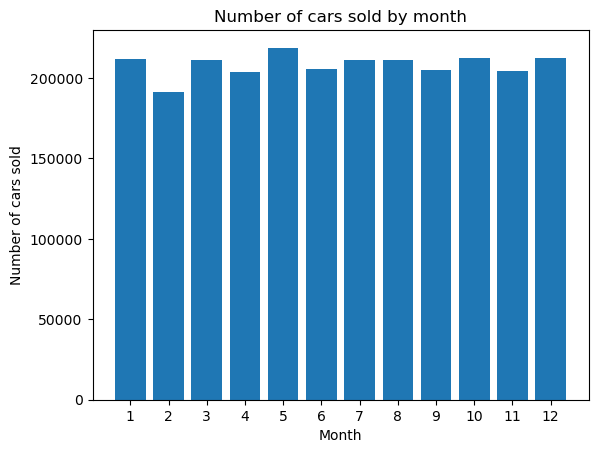

The month with the most sold cars is May
The month with the least sold cars is February


In [55]:
import calendar
import matplotlib.pyplot as plt

# Create a new column for the month
ds['Month'] = ds['Date'].dt.month

# Group the dataframe by month and count the number of sales
month_counts = ds.groupby('Month')['Car Make'].count()

# Find the month with the maximum number of sales
max_month = month_counts.idxmax()

# Find the month with the minimum number of sales
min_month = month_counts.idxmin()

# Convert the month_counts series to a dataframe and add a 'Month' column
month_counts_ds = month_counts.to_frame().reset_index()

# Create a bar chart of the number of sales for each month
plt.bar(month_counts_ds['Month'], month_counts_ds['Car Make'])

# Set the title and axis labels
plt.title('Number of cars sold by month')
plt.xlabel('Month')
plt.ylabel('Number of cars sold')

# Set the x-axis tick labels to display every month
plt.xticks(month_counts_ds['Month'][::1])

# Display the chart
plt.show()

print('The month with the most sold cars is', calendar.month_name[max_month])
print('The month with the least sold cars is', calendar.month_name[min_month])

In [61]:
top_salespersons = ds['Salesperson'].value_counts().head(5)
print(top_salespersons)

Michael Smith      1229
Michael Johnson     976
David Smith         821
James Smith         796
Jennifer Smith      753
Name: Salesperson, dtype: int64


In [68]:
# Group the dataframe by salesperson and sum the commission earned
salesperson_commission = ds.groupby('Salesperson')['Commission Earned'].sum()

# Sort the salespeople by commission earned in descending order
sorted_salespeople = salesperson_commission.sort_values(ascending=False)

# Select the top 5 salespeople by commission earned
top_5_salespeople = sorted_salespeople.head(5)

# Display the commission earned by each of the top 5 salespeople
for salesperson, commission in top_5_salespeople.items():
    print(salesperson, "earned a commission of $", commission)

Michael Smith earned a commission of $ 3658467.56
Michael Johnson earned a commission of $ 2883629.29
David Smith earned a commission of $ 2456566.33
James Smith earned a commission of $ 2448405.59
Robert Smith earned a commission of $ 2275950.52


In [63]:
most_sold_car_make = ds['Car Make'].value_counts().idxmax()
print("The most sold car make is:", most_sold_car_make)

The most sold car make is: Honda


In [64]:
most_sold_car_model = ds['Car Model'].value_counts().idxmax()
print("The most sold car model is:", most_sold_car_model)

The most sold car model is: Silverado


In [69]:
least_sold_car_make = ds['Car Make'].value_counts().idxmin()
print("The least sold car make is:", least_sold_car_make)

The least sold car make is: Nissan


In [70]:
least_sold_car_model = ds['Car Model'].value_counts().idxmin()
print("The least sold car model is:", least_sold_car_model)

The least sold car model is: Altima


In [74]:
# Group the dataframe by car make and count the number of sales for each make
sales_by_make = ds.groupby('Car Make').size()

print(sales_by_make)

Car Make
Chevrolet    500455
Ford         499781
Honda        500687
Nissan       498930
Toyota       500147
dtype: int64


In [75]:
# Group the dataframe by car model and count the number of sales for each model
sales_by_model = ds.groupby('Car Model').size()

print(sales_by_model)

Car Model
Altima       498819
Civic        500498
Corolla      500162
F-150        499679
Silverado    500842
dtype: int64


# Commission Analysis

In [78]:
# Calculate the commission rate distribution
commission_rate_distribution = ds['Commission Rate'].describe()

# Print the commission rate distribution
print(commission_rate_distribution)

count    2.500000e+06
mean     9.998766e-02
std      2.887202e-02
min      5.000014e-02
25%      7.496450e-02
50%      1.000058e-01
75%      1.250065e-01
max      1.500000e-01
Name: Commission Rate, dtype: float64


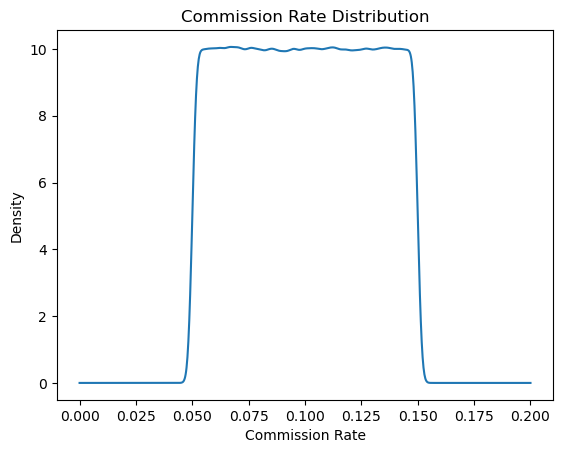

In [88]:
# Create a density plot of the commission rate distribution
ds['Commission Rate'].plot(kind='density')
plt.xlabel('Commission Rate')
plt.title('Commission Rate Distribution')
plt.show()

The resulting density plot graph shows commision rates are uniformly distributed among sales people.

# Correlation Matrix

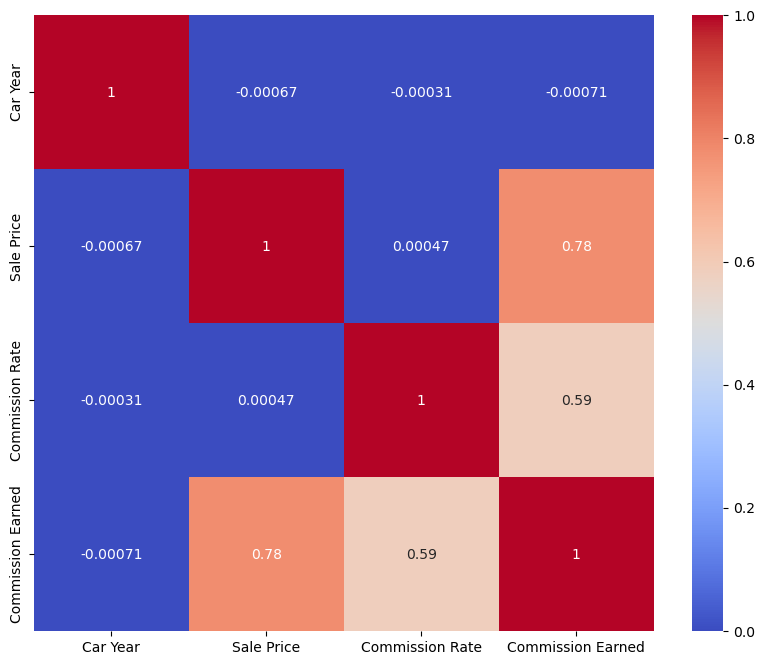

In [94]:
plt.figure(figsize=(10, 8))
sns.heatmap(ds.corr(), annot=True, cmap='coolwarm')
plt.show()

The correllation matrix suggests:

    - The Sale Price of a car, Commision Earned and Rate are weakly negatively correlated with the year of the car, however  
    since the value is so little, they're basically not correlated
    
    - As expected, the Sale Price, and Commission Earned are highly correlated, the more expensive a car sold, the more a 
    salesperson ends up making
    
    - The Commision Rate and Commision Earned are moderatly correlated. The higher the Commision Rate, the more the 
    Salesperson Earns.
   
    - The Commision Rate and Sale Price are basically not correlated.

## Is there a discrepancy in commision rates? 
### Do the more succesful salespeople have higher commision rates than the less succesful?

In [103]:
commission_earned = ds['Commission Earned']

# Create four evenly spaced percentiles
percentiles = np.percentile(commission_earned, [25, 50, 75])

# Assign each row to one of the four percentiles
ds['Commission Percentile'] = pd.cut(commission_earned, bins=[0] + list(percentiles) + [max(commission_earned)])


# Calculate the mean commission rate for each Commission Percentile group
commission_rate_by_percentile = ds.groupby('Commission Percentile')['Commission Rate'].mean()

# Select the percentiles
quarter_percentile = commission_rate_by_percentile.iloc[0:1]
half_percentile = commission_rate_by_percentile.iloc[1:2]
third_quarter_percentile = commission_rate_by_percentile.iloc[2:3]
full_percentile = commission_rate_by_percentile.iloc[3:4]

# Calculate the average commission rate for each group
quarter_mean_commission_rate = quarter_percentile.mean()
half_mean_commission_rate = half_percentile.mean()
third_quarter_mean_commission_rate = third_quarter_percentile.mean()
full_mean_commission_rate = full_percentile.mean()

# Print the results
print(f"First Quarter Mean Commission Rate: {round(quarter_mean_commission_rate * 100)}%")
print(f"Quarter to Half Mean Commission Rate: {round(half_mean_commission_rate  * 100)}%")
print(f"Half to Third Quarter Mean Commission Rate: {round(third_quarter_mean_commission_rate  * 100)}%")
print(f"Third Quarter to Top Mean Commission Rate: {round(full_mean_commission_rate  * 100)}%")

First Quarter Mean Commission Rate: 8%
Quarter to Half Mean Commission Rate: 9%
Half to Third Quarter Mean Commission Rate: 10%
Third Quarter to Top Mean Commission Rate: 12%


The Data suggests that __the more succesful salespeople have a higher commision rate than the less succesful ones__.

## Are certain car models inclined to sell for more than others?

In [108]:
model_commission = ds.groupby('Car Model')['Commission Earned'].mean().sort_values(ascending=False)
print(model_commission)

Car Model
Corolla      3003.309835
Altima       3002.709561
Silverado    3002.219432
Civic        2998.917742
F-150        2997.871415
Name: Commission Earned, dtype: float64


Evidently Corollas sell for the most at __$3003,31__ on average, while F-150 sells for the least at __2997,87__. 

## How about certain car makes?

In [109]:
makes_commission = ds.groupby('Car Make')['Commission Earned'].mean().sort_values(ascending=False)
print(makes_commission)

Car Make
Honda        3003.292195
Chevrolet    3001.865313
Toyota       3000.921184
Nissan       3000.193334
Ford         2998.748033
Name: Commission Earned, dtype: float64


Evidently Hondas sell for the most at __$3003,29__ on average, while Ford sells for the least at __2998,74__. 

## Do newer cars sell for more?

In [114]:
nc_corr = ds['Car Year'].corr(ds['Sale Price'])
print(nc_corr)

-0.0006665070424949082


There is no significant correlation between the car's age and how much it sells for.

# Conclusion

By analyzing this dataset, I have found a few interesting insights which the dealership may use to improve their operations.
Some of these key findings include:
    
* The average car sale price is __$30012.18__ and the average commissioned earned is __3001.00__
* The Car __Models__ that __sells for highest are the Corolla, Altima and Silverado__ (in order).
* The Car __Makes__ that __sells for the highest are Hondas, Chevrolets and Toyotas__ (in order).
* Car sales were __highest in May__ and __lowest in February__
* The top 5 Salespeople are __Michael Smith, Michael Johnson, David Smith, James Smith, and Jennifer Smith__
* The Sales Price and Commission Earned are highly correlated, the more expensive a car sold, 
    the more a salesperson ends up making
* There is __no correlation between a car's age and how much it sells for__
* The most sold car makes are __Hondas, least sold are Nissans__
* The most sold car model are __Silverados, least sold are Altimas__
    